# Simulating and studying an AR process

In [145]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar
from tqdm import trange

In [153]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [154]:
model = ar.AutoRegressive(steps=1000, paths=9, a=np.array([0.2, 0.2, 0.1]), start=0, dist='normal')
data = model.generate()

100%|██████████| 998/998 [00:00<00:00, 271231.48it/s]

9 different AR(2) processes of 1000 steps have been generated with increments following normal distribution


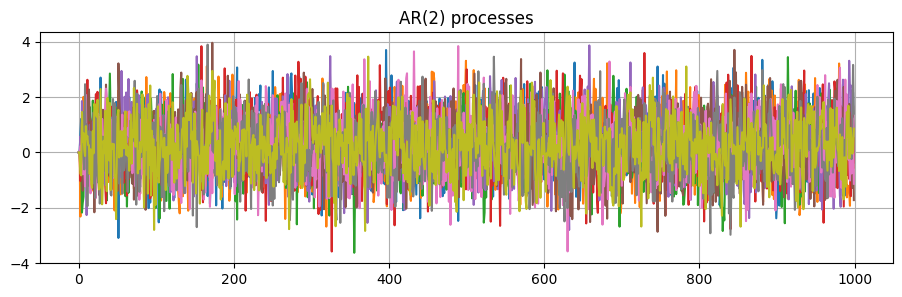

In [155]:
model.plot_paths(data=data)

In [156]:
coefficients = model.fit_ar()
df(coefficients).head()

,0,1,2,3,4,5,6,7,8
0,0.192684,0.203647,0.174768,0.259738,0.205687,0.164921,0.196238,0.137814,0.201131
1,0.223293,0.267887,0.207542,0.213770,0.205057,0.241000,0.210836,0.175645,0.153679
2,0.095990,0.087073,0.086273,0.083577,0.086069,0.088519,0.077701,0.050175,0.089839


In [157]:
comparison = np.vstack([model.coefficients.mean(axis=1), model.a])
df(comparison.T).rename(columns={0: 'Average estimated coefficients', 1: 'Real coefficients'})

,Average estimated coefficients,Real coefficients
0,0.192959,0.2
1,0.210968,0.2
2,0.082802,0.1


In [158]:
moments, jb, acf, stat = model.study_errors(20)

100%|██████████| 998/998 [00:00<00:00, 193300.18it/s]




STUDYING ERRORS




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000347,0.000665,0.000103,-0.000082,-0.000324,0.000856,0.000278,-0.001003,-0.000153
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-3.237497,-2.877014,-3.798913,-3.695363,-3.015176,-2.985420,-3.680391,-3.058891,-3.042926
25%,-0.712671,-0.663148,-0.648647,-0.657930,-0.689045,-0.712969,-0.680917,-0.697711,-0.656442
50%,-0.027520,0.000000,0.047194,-0.009311,0.005865,-0.026530,0.019887,-0.013153,-0.013228
75%,0.674639,0.693842,0.691427,0.714593,0.649375,0.650614,0.683305,0.667792,0.672107
max,3.279506,2.875222,3.133993,3.242781,3.486912,3.562652,3.406676,3.605524,3.133593




MOMENTS SUMMARY


,0,1,2,3,4,5,6,7,8
mean,-0.000347,0.000665,0.000103,-0.000082,-0.000324,0.000856,0.000278,-0.001003,-0.000153
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skewness,0.146758,0.002695,-0.192014,-0.042044,0.124495,0.148667,-0.005467,0.039809,-0.069248
kurtosis,2.910351,2.847109,3.087850,3.140577,2.940845,2.954061,2.987329,2.990440,2.918492




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5,6,7,8
jb stat,3.924521,0.975199,6.466464,1.118032,2.728955,3.771600,0.011671,0.267938,1.076032
p value,0.140540,0.614099,0.039430,0.571771,0.255514,0.151708,0.994182,0.874617,0.583906




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5,6,7,8
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.123981,0.117933,0.108646,0.105828,0.108372,0.116265,0.098603,0.059869,0.105854
2,0.234753,0.277358,0.216419,0.221529,0.214266,0.250245,0.217995,0.176536,0.162748
3,0.086420,0.053742,0.102670,0.007280,0.012346,0.053002,0.056857,0.070018,0.063663
4,0.060856,0.038029,0.030656,0.026958,0.050717,0.080710,0.047279,0.012271,0.020657
5,0.014083,-0.018470,0.058288,-0.030908,0.035032,0.040026,0.019606,0.031876,-0.013149
6,0.047809,0.020100,-0.030107,-0.009553,0.043407,0.025543,-0.060683,-0.006381,0.005685
7,0.022102,-0.041803,0.048901,0.001081,0.056784,0.003551,-0.018220,0.025246,-0.071234
8,0.066808,0.014053,-0.011518,0.024280,-0.057042,0.053394,-0.066324,-0.037298,-0.044793
9,0.010863,-0.016761,-0.031282,0.020586,0.020334,-0.039974,-0.005041,-0.034958,-0.017433


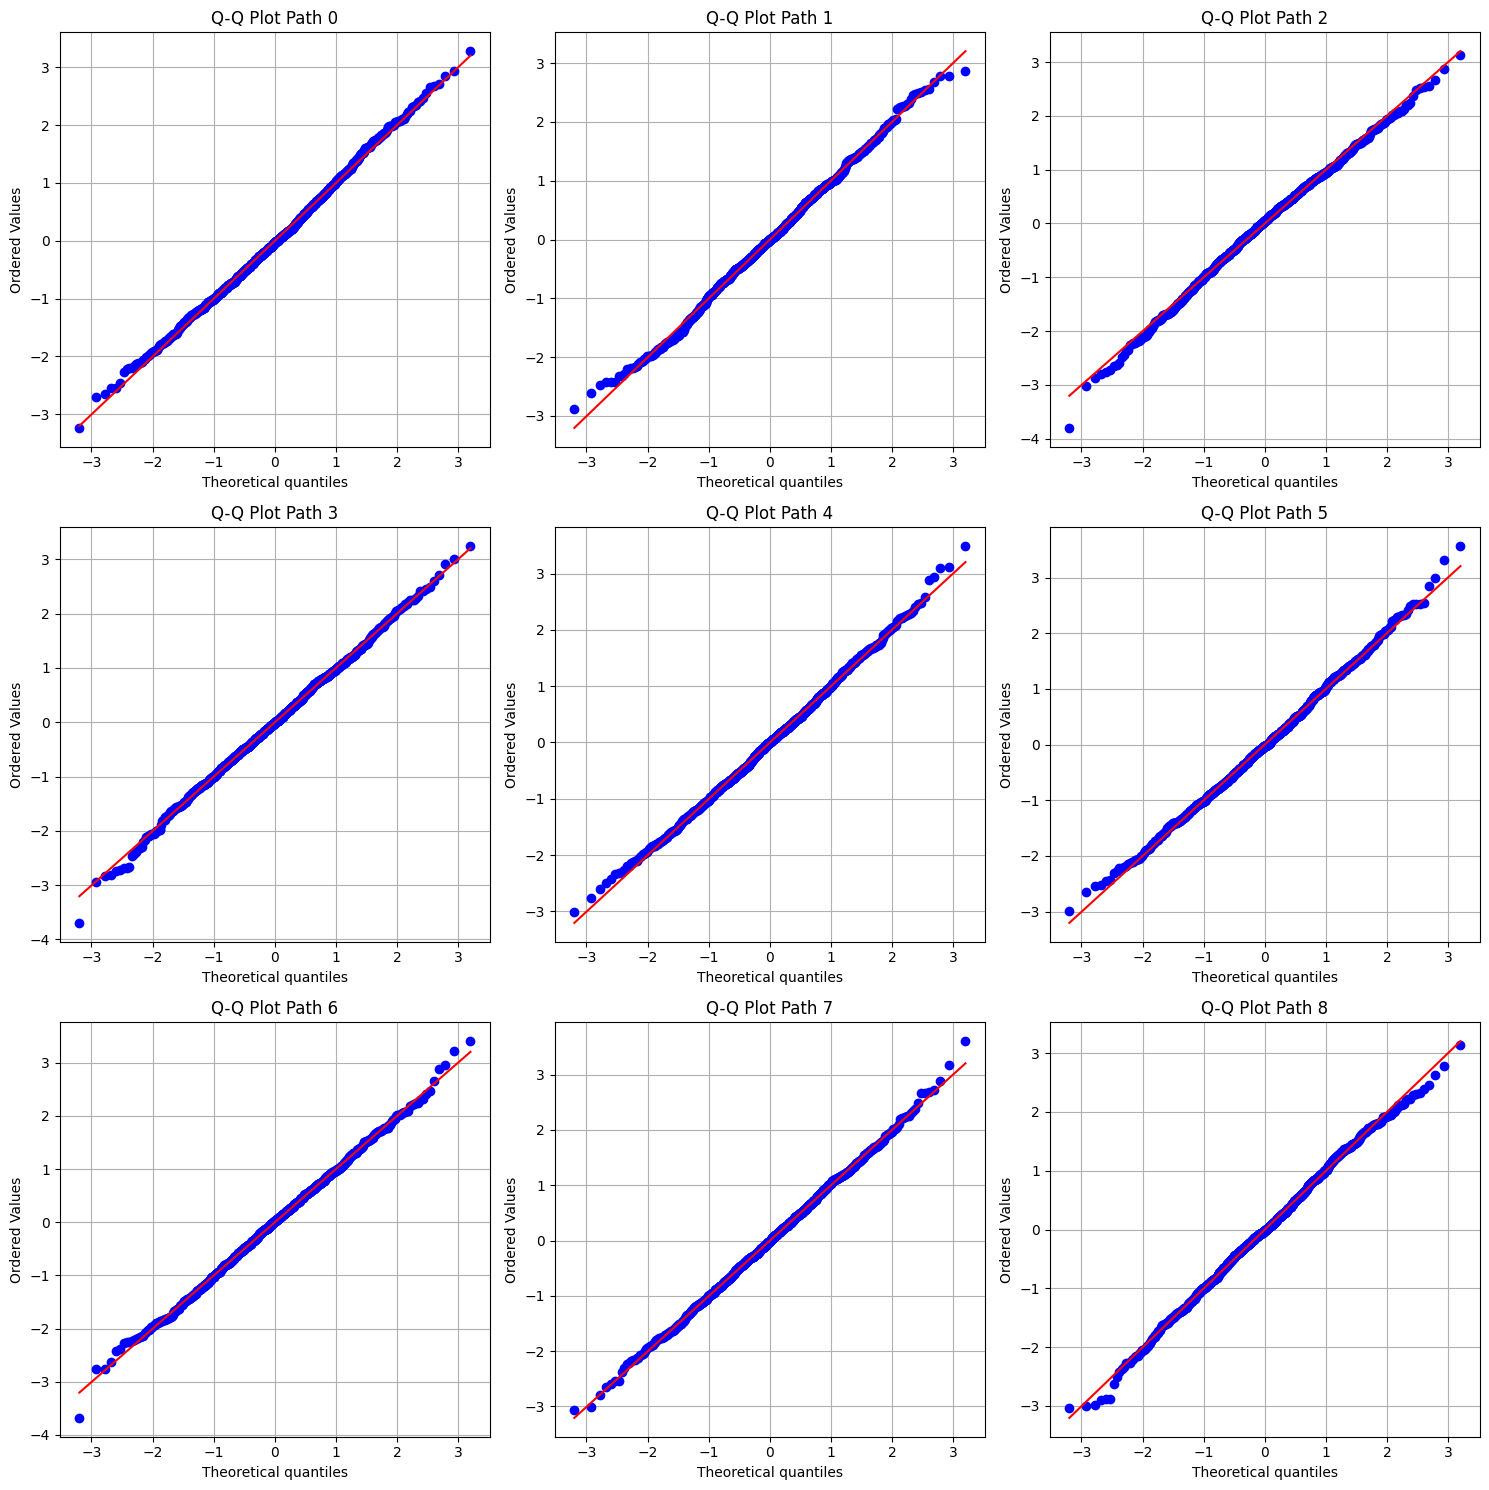

In [159]:
epsilon = model.epsilon
model.plot_qq_2d(epsilon)
     


In [160]:
from utilities import jb_test